# Exercise 2.1

## a) Bellman with State Value Function


In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
class GridWorldEnv():
    def __init__(self, grid_size=5):
        # Initialize 5x5 grid as a 5x5 matrix with zeros
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.agent_position = (0, 0)
        self.action_space = ["south", "north", "east", "west"]
        self.reward = 0

    def step(self, action, state):
        # Update agent position based on action
        if action == "south":
            new_position = (state[0] + 1, state[1])
        elif action == "north":
            new_position = (state[0] - 1, state[1])
        elif action == "east":
            new_position = (state[0], state[1] + 1)
        elif action == "west":
            new_position = (state[0], state[1] - 1)
        
        # Check for out of bounds, update position and give -1 reward for going out of bounds
        if new_position[0] < 0 or new_position[0] > 4 or new_position[1] < 0 or new_position[1] > 4:    
            new_position = (
                max(0, min(new_position[0], 4)),
                max(0, min(new_position[1], 4))
            )
            self.reward = -1
            self.agent_position = new_position
            return self.agent_position, self.reward  # Return immediately after setting out-of-bounds reward

        # Handle special states
        elif new_position == (0, 1):
            new_position = (4, 1) 
            self.reward = 10
        elif new_position == (0, 3):
            new_position = (2, 3)
            self.reward = 5
        # If no special state, give reward of 0
        else:
            self.reward = 0

        # Update agent position
        self.agent_position = new_position
        return self.agent_position, self.reward 
    

    def reset(self):
        self.agent_position = (0, 0)
        self.reward = 0

    def render(self):
        print(self.grid)
        print(f"Agent position: {self.agent_position}")
        print(f"Reward: {self.reward}")


In [129]:
num_iterations = 50

state_values_total = np.zeros((num_iterations, 5, 5))

def state_value_iteration_bellman(env, gamma=0.9, num_iterations=1000):
    for iteration in range(num_iterations):
        state_values = np.zeros((5, 5))
        # Iterate over all states
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                # Adjust state values for special states to their target states
                if (i, j) == (0, 1):
                    state_values[i, j] = state_values[4, 1]
                elif (i, j) == (0, 3):
                    state_values[i, j] = state_values[2, 3]
                else:
                    # Update state value using the bellman equation for each state
                    for action in env.action_space:
                        agent_position, reward = env.step(action, (i, j))
                        state_values[i, j] += 1/(len(env.action_space)) * (reward + gamma * state_values_total[iteration - 1, agent_position[0], agent_position[1]])

        state_values_total[iteration] = state_values
    return state_values_total

env = GridWorldEnv()
state_values_total = state_value_iteration_bellman(env, gamma=0.9, num_iterations=num_iterations)
print(state_values_total[num_iterations - 1])

[[ 3.88842495  0.          5.07006099  0.          1.92628721]
 [ 1.87978494  3.4445852   2.6241913   2.27307428  0.82767407]
 [ 0.25264872  0.95781718  0.87508822  0.54743569 -0.23763244]
 [-0.85652319 -0.31562291 -0.24042563 -0.47774399 -1.08276951]
 [-1.77642836 -1.26390196 -1.15054352 -1.34780776 -1.9033117 ]]


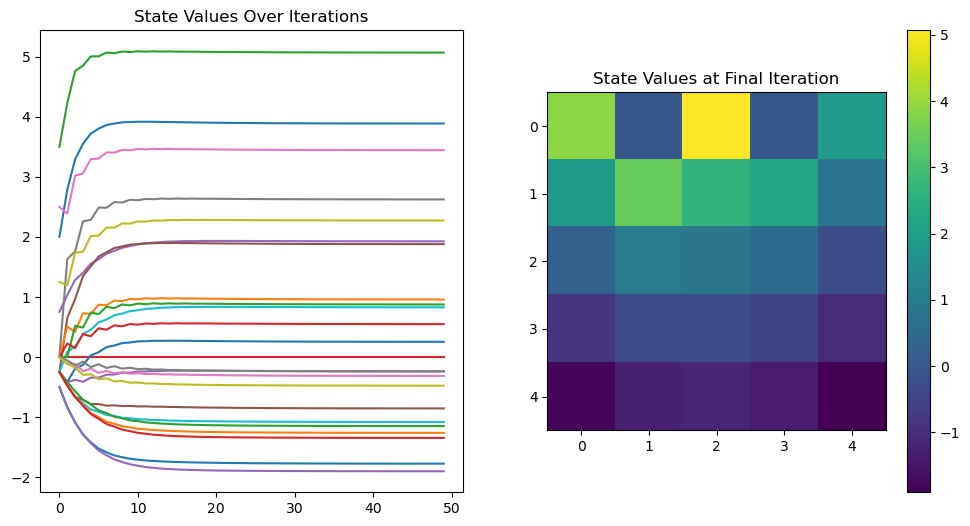

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the state values over iterations
for i in range(5):
    for j in range(5):
        ax1.plot(state_values_total[:, i, j])
ax1.set_title('State Values Over Iterations')

# Plot the values in colors
cax = ax2.imshow(state_values_total[num_iterations - 1], cmap='viridis')
fig.colorbar(cax, ax=ax2)
ax2.set_title('State Values at Final Iteration')

plt.show()



As we can see, the values converge after 10-20 iterations. Since we are using a random policy, the state values cannot change after a couple of iterations, since we are not learning anything. 

## b) Bellman with Action Value Function

In [148]:
num_iterations = 50

action_values_total = np.zeros((num_iterations, 5, 5, len(env.action_space)))

def action_value_iteration_bellman(env, gamma=0.9, num_iterations=50):
    for iteration in range(num_iterations):
        action_values = np.zeros((5, 5, len(env.action_space)))
        
        # Iterate over all states and all actions
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                for action_idx, action in enumerate(env.action_space):
                    # Compute value function using the bellman equation for each state and action
                    agent_position, reward = env.step(action, (i, j))
                    expected_value = 0
                    for next_action in env.action_space:
                        next_action_idx = env.action_space.index(next_action)
                        expected_value += (1 / len(env.action_space)) * action_values_total[iteration - 1, agent_position[0], agent_position[1], next_action_idx]
                    
                    # Update action-value using the Bellman equation for Q(s, a)
                    action_values[i, j, action_idx] = reward + gamma * expected_value

        # Store the updated action values
        action_values_total[iteration] = action_values
    return action_values_total

# Initialize environment and run the iteration
env = GridWorldEnv()
action_values_total = action_value_iteration_bellman(env, gamma=0.9, num_iterations=num_iterations)

# Print the final action-value table for the last iteration for going north
print(action_values_total[num_iterations - 1][:, :, 1])

[[ 2.49964263  1.95060902  3.56311419  1.13181447  0.73371673]
 [ 3.49964263  8.86254802  4.56311419  5.49275057  1.73371673]
 [ 1.69186653  3.10018659  2.36183117  2.04582562  0.7449648 ]
 [ 0.22744403  0.86209509  0.78763879  0.49275057 -0.21381087]
 [-0.77081077 -0.2840007  -0.21632397 -0.42991078 -0.97443427]]


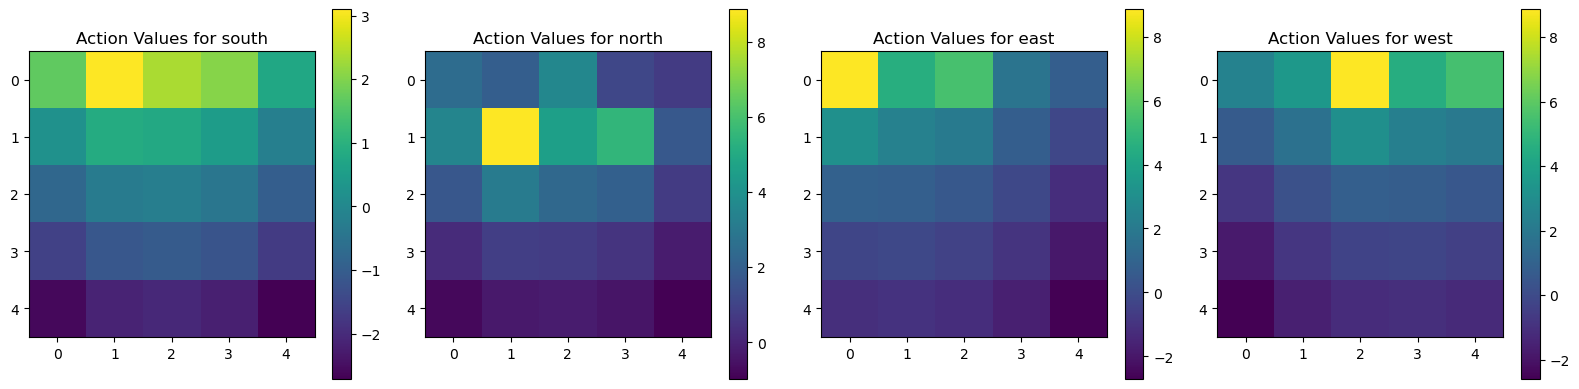

In [143]:
# Define the number of actions
num_actions = len(env.action_space)

# Create subplots for each action
fig, axes = plt.subplots(1, num_actions, figsize=(16, 4))

# Plot the action values for each action
for action_index in range(num_actions):
    # Extract the action values for the current action
    action_values_to_plot = action_values_total[num_iterations - 1, :, :, action_index]
    
    # Plot the values in colors
    cax = axes[action_index].imshow(action_values_to_plot, cmap='viridis')
    fig.colorbar(cax, ax=axes[action_index])
    axes[action_index].set_title(f'Action Values for {env.action_space[action_index]}')

plt.tight_layout()
plt.show()

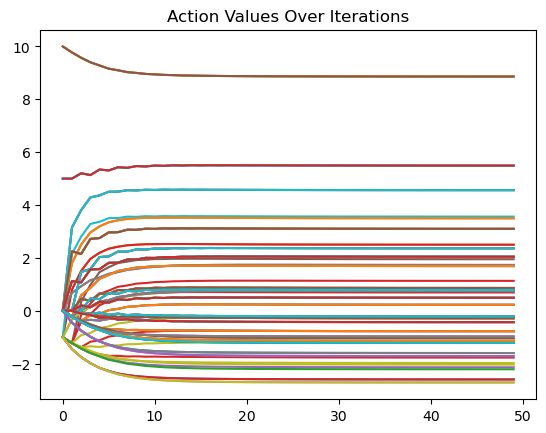

In [145]:
# Plot the action values for all states and actions over tim3
for i in range(5):
    for j in range(5):
        plt.plot(action_values_total[:, i, j])
plt.title('Action Values Over Iterations')
plt.show()

